# <center> EDA-2. Математическая статистика в контексте EDA
---

### 2. Описательная статистика. Меры центральной тенденции в Python

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/wine_cleared.csv')

In [3]:
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [4]:
# Задание 2.1
# Вычислите наименьший балл за вино в датасете

data['points'].min()

80

In [5]:
# Задание 2.2
# Вычислите наименьшую цену за бутылку в наборе данных

data['price'].min()

4.0

Установим библиотеку:
```shell
pip install statistics
```

In [6]:
import statistics

СРЕДНЕЕ АРИФМЕТИЧЕСКОЕ

In [7]:
# Задание 2.3
# Вычислите среднюю стоимость бутылки вина при помощи функции statistics.mean() библиотеки statistics. Округлите значение до сотых

round(statistics.mean(data['price']), 2)

35.36

In [8]:
# Задание 2.4 (Самопроверка)
# Вычислите среднюю стоимость бутылки вина при помощи стандартных функций Python

sum(data['price']) / len(data['price'])

35.36338912999136

МЕДИАНА

In [9]:
# Задание 2.5
# Вычислите медиану стоимости бутылки вина при помощи функции statistics.median() библиотеки statistics. Округлите значение до сотых

round(statistics.median(data['price']), 2)

28.0

In [10]:
# Задание 2.6
# Вычислите медиану стоимости бутылки вина при помощи стандартных функций Python

if len(data['price']) % 2:
    median = sorted(data['price'])[round((len(data['price']) - 1) / 2)]
else:
    median = (sorted(data['price'])[(len(data['price'])/ 2)] + sorted(data['price'])[(len(data['price'])/ 2) - 1]) / 2
median

28.0

МОДА

In [11]:
# Задание 2.7
# Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи функции statistics.mode() библиотеки statistics. Округлите значение до сотых

round(statistics.mode(data['price']), 2)

35.36

In [12]:
# Задание 2.8
# Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи стандартных функций Python и pandas

prices = {}
for price in data['price']:
    if price in prices:
        prices[price] +=1
    else:
        prices[price] = 1
reverse_prices = dict(zip(prices.values(), prices.keys()))
round(reverse_prices[max(reverse_prices.keys())], 2)

35.36

In [13]:
mode = round(data["price"].value_counts().index[0],2)
mode

35.36

---

### 3. Корреляция

In [14]:
# Задание 3.3
# Для расчёта коэффициента корреляции применим функцию df.corr() библиотеки pandas
# data.corr()
# Вычислите коэффициент корреляции между переменными в датасете винных обзоров. 
# В ответ запишите величину коэффициента корреляции между ценой за бутылку и баллами за вино. Округлите ответ до шести знаков после запятой

data[['price', 'points']].corr()

,price,points
price,1.000000,0.402137
points,0.402137,1.000000


---

### 4. Типы корреляций. Корреляция Пирсона

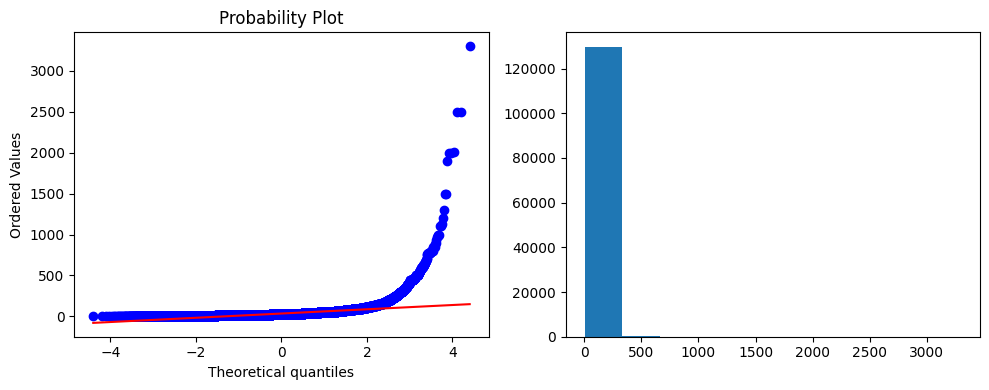

In [26]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(data['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

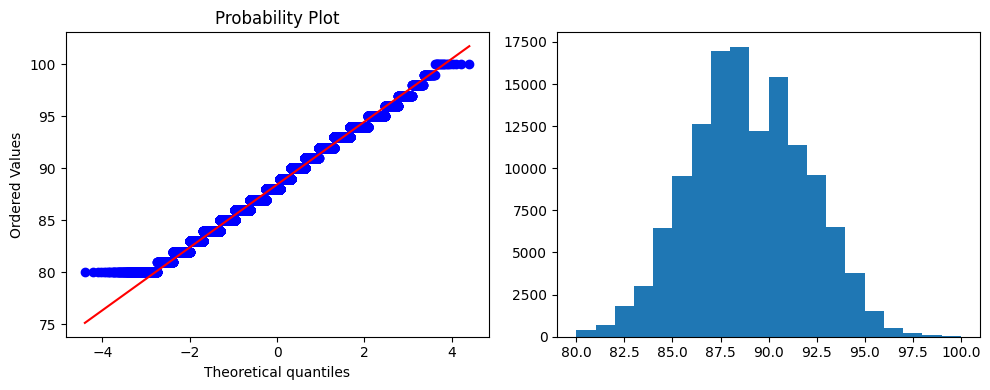

In [31]:
# Задание 4.2
# Постройте приведённые выше графики для признака points из датасета винных обзоров и выберите верное утверждение

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
stats.probplot(data['points'], plot=plt)

plt.subplot(1, 2, 2)
plt.hist(data['points'], bins=20)

plt.tight_layout()

plt.show()